<a href="https://colab.research.google.com/github/youngwoo3283/codestates_section1_project/blob/main/section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [259]:
import seaborn as sns

In [260]:
df = pd.read_csv('vgames2.csv',index_col = 0)

In [261]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [262]:
#중복값 확인
#결측치를 제거하고 나면 없음
df.duplicated().sum() 

1

## 결측치 확인하기
- isnull()이용
- drop()이용

In [263]:
#결측치 확인
#16598개인데 year와 genre publisher에 결측치 있는 것 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [264]:
df_nan = df[df['Genre'].isnull()|df['Year'].isnull()|df['Publisher'].isnull()]

In [265]:
id = is_date_array_normalized = df[df['Genre'].isnull()|df['Year'].isnull()|df['Publisher'].isnull()].index

In [266]:
#결측치 제거
df.drop(index = id,inplace = True)

In [267]:
df.info() #모든 요소가 16241

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


## 이상치 확인하기
- value_count()로 확인

- boxplot()로 확인하기

In [268]:
df.Year.value_counts() #확인 결과 년도는 4자리인데 3자리인게 있음

2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

In [269]:
df[df.Year == 13.0] #해당 게임을 검색해본 결과 얘네는 2013년에 나온 것들인데 앞에 '20'이 빠진 것임

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8551,Heroes VS,PSP,13.0,Fighting,Namco Bandai Games,0,0,0.02,0
10923,Kuma-Tomo,3DS,13.0,Misc,Namco Bandai Games,0,0,0.19,0


In [270]:
df_year = df.query('Year < 1000') #확인해보니 100개의 년도 앞자리가 빠져있는것이 있음
df_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
75,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
82,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
214,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0,0,0.01
305,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0,0.02,0,0
769,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15986,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0,0,0.02,0
16104,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0,0,0
16150,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05
16395,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [271]:
# 이상한 것중에서 최소 ~ 최대는 0에서 98까지 있음 
# 게임은 1900년대에서 현재이니 1900이나 2000을 더해주면 된다.
# 0에서 22 사이에는 2000을 더해줌  
# 22보다 크고 98까지는 1900을 더해줌

def plus(x):
  if x < 23:
    x = x + 2000
    return x
  elif x < 99:
    x = x + 1900
    return x
  else:
    return x


df.Year = df.Year.apply(func = plus)


In [272]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [273]:
df.loc[75] #기존에 9.0인데 제대로 적용되었다.

Name           Age of Empires III: Complete Collection
Platform                                            PC
Year                                            2009.0
Genre                                         Strategy
Publisher                       Microsoft Game Studios
NA_Sales                                          0.01
EU_Sales                                          0.12
JP_Sales                                             0
Other_Sales                                       0.03
Name: 75, dtype: object

## sale 값 조정하기
 - k나 m을 수치로 변경하기
 - object을 int로 변경

In [274]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [275]:
#얘는 sale가 M이나 K가 붙어있으니 이를 위처럼 apply로 다시 조정한다.
#원래 million단위이니 M은 빼고 K는 1000을 의미하니 0.001을 곱해준다.
df.loc[11]

Name                  Ford Racing
Platform                       PS
Year                       2001.0
Genre                      Racing
Publisher      Empire Interactive
NA_Sales                     480K
EU_Sales                    0.33M
JP_Sales                       0K
Other_Sales                  0.06
Name: 11, dtype: object

In [276]:
def change(x):
  if x[-1] == 'K':
    x = x.replace('K','')
    x  = float(x) * 0.001
    return x
  elif x[-1] == 'M':
    x =  x.replace('M','')
    x = float(x)
    return x
  else:
    x = float(x)
    return x

In [277]:
df['NA_Sales'] = df['NA_Sales'].apply(func = change)

In [278]:
df.loc[11] #NA_Sales가 숫자로 바꿔는것을 확인

Name                  Ford Racing
Platform                       PS
Year                       2001.0
Genre                      Racing
Publisher      Empire Interactive
NA_Sales                     0.48
EU_Sales                    0.33M
JP_Sales                       0K
Other_Sales                  0.06
Name: 11, dtype: object

In [279]:
df['JP_Sales'] = df['JP_Sales'].apply(func = change)
df['EU_Sales'] = df['EU_Sales'].apply(func = change)
df['Other_Sales'] = df['Other_Sales'].apply(func = change)

In [280]:
df.loc[11] #나머지가 숫자로 바꿔는것을 확인하였다.

Name                  Ford Racing
Platform                       PS
Year                       2001.0
Genre                      Racing
Publisher      Empire Interactive
NA_Sales                     0.48
EU_Sales                     0.33
JP_Sales                      0.0
Other_Sales                  0.06
Name: 11, dtype: object

In [281]:
#모두 flaot으로 바꿔줌
df['NA_Sales'].astype(float)
df['EU_Sales'].astype(float)
df['JP_Sales'].astype(float)
df['Other_Sales'].astype(float)

1        0.00
2        0.01
3        0.00
4        0.00
5        0.04
         ... 
16594    0.01
16595    0.00
16596    0.13
16597    0.03
16598    0.01
Name: Other_Sales, Length: 16241, dtype: float64

# 어떤 게임이 제일 많이 팔렸나?

In [282]:
#판매 총합 칼럼만들기
df['sum_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [283]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [284]:
df[df.sum_sales == 82.74000000000001]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [285]:
#다 닌텐도 게임임
df.sort_values(by = 'sum_sales', ascending = False).head(10)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4200,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12580,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7830,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1204,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6938,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3015,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16532,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10489,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [286]:
df_groupby = df.groupby('Genre').sum().sort_values(by = 'sum_sales' , ascending = False)

In [287]:
df_groupby.index

Index(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Racing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy'],
      dtype='object', name='Genre')

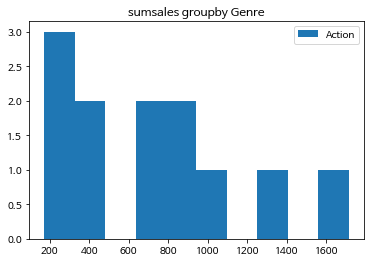

In [288]:
plt.hist(df_groupby['sum_sales'])
plt.title('sumsales groupby Genre')
plt.legend(('Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Racing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy'))


In [289]:
('Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Racing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy')

('Action',
 'Sports',
 'Shooter',
 'Role-Playing',
 'Platform',
 'Misc',
 'Racing',
 'Fighting',
 'Simulation',
 'Puzzle',
 'Adventure',
 'Strategy')

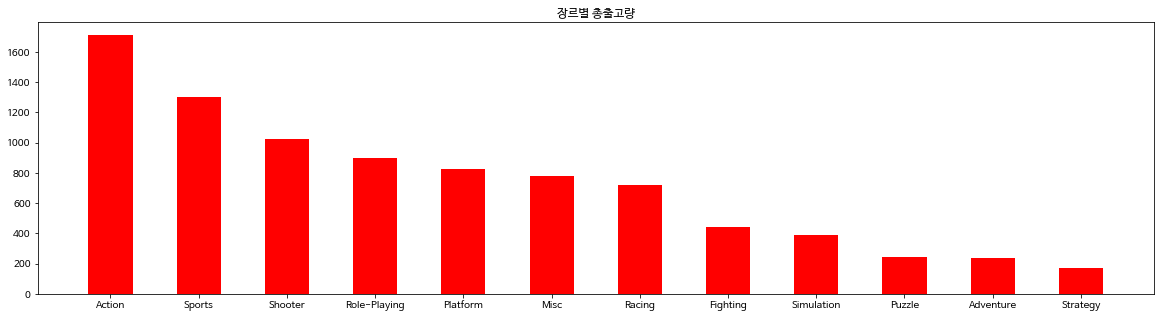

In [290]:
plt.figure(figsize = (20,5))
plt.bar(df_groupby['sum_sales'].index,df_groupby['sum_sales'],color = 'red',width = 0.5)
plt.title('장르별 총출고량');

## 장르를 보니 **액션**, **스포츠**, **fps**, **롤플레잉**, **플랫폼형** 게임이 출고량이 많다는 것을 알 수 있다.  
그럼 이제 지역에 따른 출고량을 살펴보자

In [291]:
df_groupby

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
Genre,,,,,,
Action,6505617.0,858.75,513.64,156.60,183.99,1712.98
Sports,4610619.0,667.26,370.97,134.76,132.35,1305.34
Shooter,2567579.0,574.48,310.23,38.18,101.86,1024.75
Role-Playing,2940339.0,318.76,183.09,342.93,56.73,901.51
Platform,1749321.0,445.38,200.63,130.53,51.45,827.99
Misc,3374273.0,394.73,208.15,104.18,72.64,779.70
Racing,2443902.0,354.70,235.02,56.32,76.51,722.55
Fighting,1673860.0,220.35,99.90,87.14,36.15,443.54
Simulation,1697540.0,181.43,112.99,63.54,31.32,389.28


In [292]:
NAs = df_groupby.sort_values(by = 'NA_Sales',ascending = False)

In [293]:
NA = df_groupby.NA_Sales.sort_values(ascending = False)
EU = df_groupby.EU_Sales.sort_values(ascending = False)
JP = df_groupby.JP_Sales.sort_values(ascending = False)
OTHER = df_groupby.Other_Sales.sort_values(ascending = False)

Text(7, 140, 'OTHER')

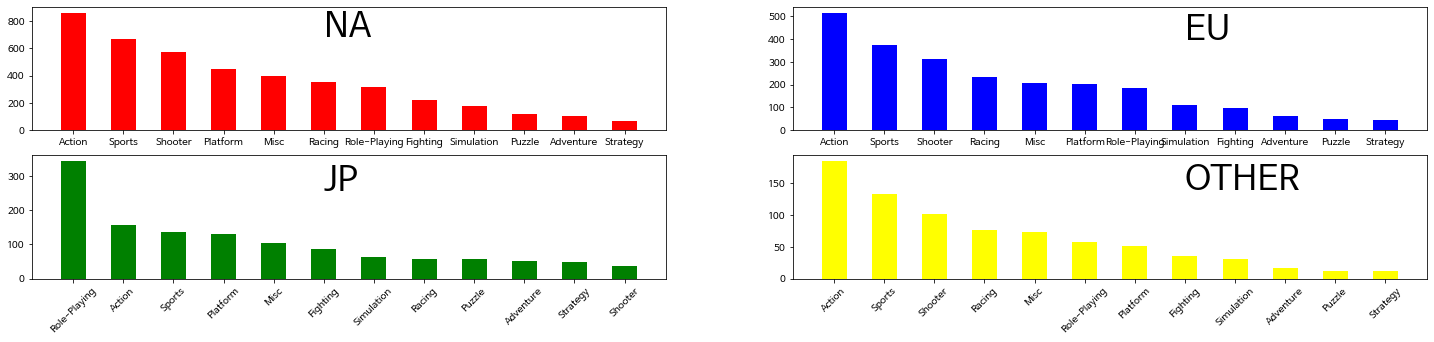

In [294]:
#4개의 그래프 필요 subplot을 이용하자

plt.figure(figsize = (25,5))

ax1 = plt.subplot(221)
ax1.bar(NA.index,NA,color = 'red',width = 0.5)
plt.text(5,690,'NA',size = 35)

ax2 = plt.subplot(222)
ax2.bar(EU.index,EU,color = 'blue',width = 0.5)
plt.text(7,400,'EU',size = 35)

ax3 = plt.subplot(223)
ax3.bar(JP.index,JP,color = 'green',width = 0.5)
#plt.title('JP')
plt.text(5,260,'JP',size = 35)
plt.xticks(rotation = 45)

ax4 = plt.subplot(224)
ax4.bar(OTHER.index,OTHER,color = 'yellow',width = 0.5)
plt.xticks(rotation = 45)
plt.text(7,140,'OTHER',size = 35)


# 그래프 분석
___
- 제일 인기많은 장르 3개를 뽑으면 액션, 스포츠, FPS장르가 있다.
- 하지만 일본의 경우 롤플레이잉이 압도적으로 인기가 많고 그뒤로 액션 스포츠가 뒤를 이은다.( FPS는 인기가 없어서 FPS는 출시할때 일본을 고려하면 안된다.)


# 출시를 할 경우에 **액션** **스포츠**를 출시하는 경우에 많은 지역에서 인기가 있을듯 하다.
## 만약 목표소비자가 일본인 경우에는 **롤플레잉**을 하는 것도 괜찮다.

# 어디를 목표 시장으로 잡는 것이 좋을까를 보기 위해서 **지역별 총 출고량**을 살펴보자

In [295]:
df_groupby.apply(func = sum)

Year           32586052.00
NA_Sales           4307.04
EU_Sales           2393.57
JP_Sales           1271.39
Other_Sales         783.37
sum_sales          8755.37
dtype: float64

In [296]:
aa = df_groupby.apply(func = sum)


#전체 출고량중 NA와 EU의 비율
ratio_na_eu = (aa[1]+aa[2])/aa[5]
ratio_na_eu

0.7653143156714108

In [297]:
#파이그래프로 지역별 출고량 점유율을 보여줌
aa = aa[1:-1]

In [298]:
color = ['red', 'yellow', 'whitesmoke', 'lightgray']
explode = [0.1, 0.1, 0, 0]

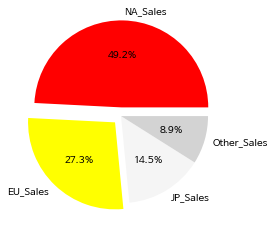

In [299]:
plt.pie(aa, labels=  aa.index,autopct='%.1f%%',colors = color,explode = explode),;

## 미국과 유럽이 전체 게임출고의 75%를 차지하고 있으니 굳이 일본시장을 겨냥해서 롤플레잉에 중점을 둘 필요는 없다. 
## 따라서 액션 스포츠 fps장르를 목표로 하되 fps는 일본에서 인기가 없으니 **액션과 스포츠**를 장르로 정하는 것이 더 유리한 것 같다.

## 이때 지역은 액션과 스포츠이지만 모든 시기를 기준으로 하였기 때문에 최근에는 다를 수 있다.

## 시기별 장르의 변화를 보자

In [300]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [301]:
# 게임 총 출고량의 변화
df_year = df.groupby(by = 'Year').sum()
df.groupby(by = 'Year').sum().head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
Year,,,,,
1980.0,10.13,0.64,0.00,0.11,10.88
1981.0,33.40,1.96,0.00,0.32,35.68
1982.0,26.92,1.65,0.00,0.31,28.88
1983.0,7.76,0.80,8.10,0.14,16.80
1984.0,33.28,2.10,14.27,0.70,50.35


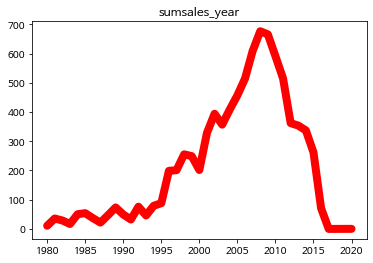

In [302]:
plt.plot(df_year.index,df_year['sum_sales'],linestyle='solid', linewidth=8,
      solid_capstyle='round',color = 'red')
plt.title('sumsales_year');

# 최근에는 콘솔게임에 대한 판매량이 저조함
## 이게 게임의 추세인지 온라인 게임은 올라가는 추세인지를 봐야함


In [303]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [304]:
#연도별 게임 트랜드?

df_years = df.groupby(by = ['Year','Genre']).sum()

In [305]:
df_years.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  sum_sales
Year   Genre                                                         
1980.0 Action        0.32      0.02       0.0         0.00       0.34
       Fighting      0.72      0.04       0.0         0.01       0.77
       Misc          2.53      0.15       0.0         0.02       2.70
       Shooter       6.56      0.43       0.0         0.08       7.07
1981.0 Action       13.86      0.81       0.0         0.12      14.79

In [328]:
df['Year'] = df['Year'].astype(str)

In [352]:
df_years = df.groupby(by =['Genre','Year']).sum()
df_years

NA_Sales  EU_Sales  JP_Sales  Other_Sales  sum_sales
Genre    Year                                                        
Action   1980.0      0.32      0.02      0.00         0.00       0.34
         1981.0     13.86      0.81      0.00         0.12      14.79
         1982.0      6.07      0.38      0.00         0.05       6.50
         1983.0      2.67      0.17      0.00         0.02       2.86
         1984.0      0.80      0.19      0.83         0.03       1.85
...                   ...       ...       ...          ...        ...
Strategy 2012.0      0.94      0.99      1.11         0.29       3.33
         2013.0      2.39      2.47      0.82         0.64       6.32
         2014.0      0.16      0.22      0.55         0.04       0.97
         2015.0      0.57      0.98      0.15         0.12       1.82
         2016.0      0.11      0.32      0.05         0.04       0.52

[388 rows x 5 columns]

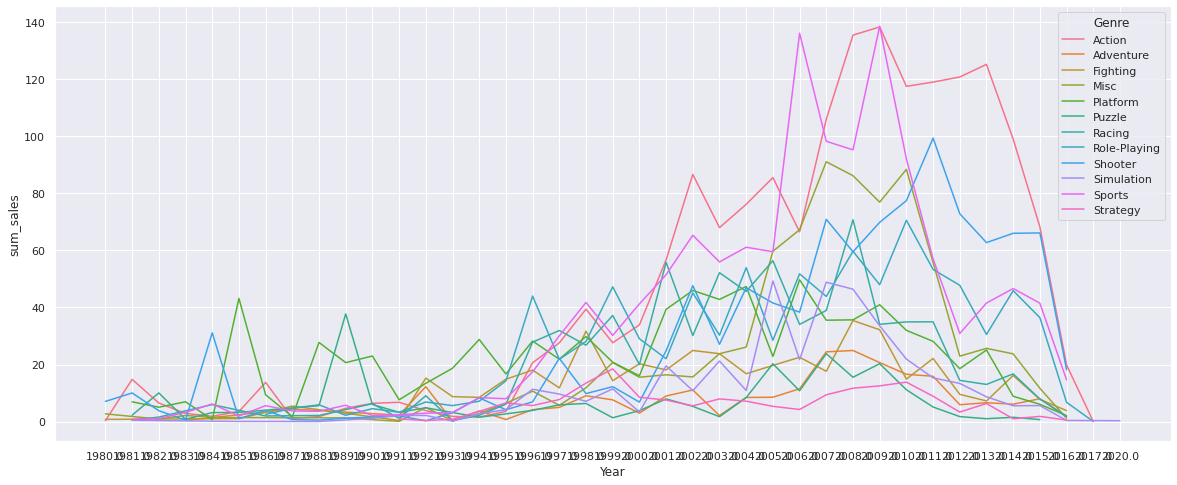

In [353]:
sns.lineplot(x = 'Year', y = 'sum_sales', hue = 'Genre', data = df_years)

In [350]:
df_yearss = df.sort_values('Year')

In [339]:
import seaborn as sns

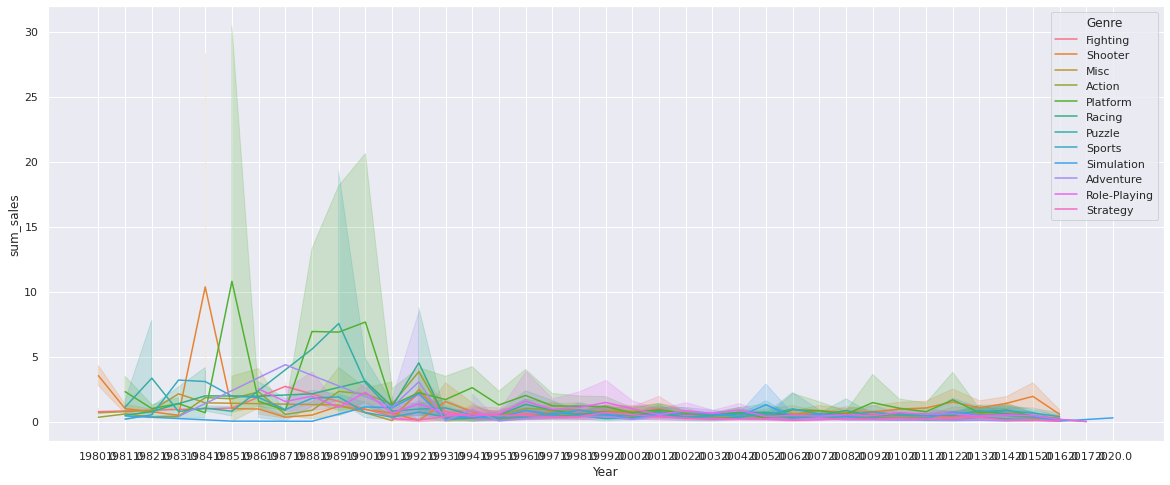

In [349]:
sns.set(rc = {'figure.figsize':(20,8)})

sns.lineplot(x='Year', y='sum_sales', hue='Genre', data=df_years) 


In [ ]:
df

# 어떤 게임이 평가가 높은가?
- 메타스코어를 기준으로 장르별 평균 평점을 계산
- 평점이 높은 게임이 출고량이 높을까?

In [ ]:
df_meta = pd.read_csv('metacritic_18.07.2021_csv.csv')

In [ ]:
df_meta.head()

# 위에서 스포츠와 액션게임이 인기가 많으니 이 두개의 장르의 평균 평점을 보자